In [1]:
# Dependencies
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt


In [2]:
df = pd.read_excel("Task Assignment Data.xlsx")

In [3]:
xls = pd.ExcelFile("Task Assignment Data.xlsx")
print(xls.sheet_names)

['Data', 'Charge-Offs']


In [4]:
df.head(10)

,LoanNumber,MemberNumber,LoanStatus,FundedStatus,EntryDate,FundingDate,SymitarBookingDate,ClinicName,PurposeType,AmountRequested,...,AmountFunded,LoanTerm,Rate,CreditScore,CustomScore,JointCreditScore,BankruptcyScore,CQ First Payment Option - Merchant text,CQ Project Type - Merchant text,CQ Solar System Size (KW) text
0,10000.0,12345000,APPROVED,FUN,2022-01-21 14:56:00,2024-01-31,2024-01-31 14:20:00,Window World SA,SAC 18 Mon (no pmt),15000.00,...,9645.63,0,0.0,780,0,802.0,309,NaN,Home Improvement,NaN
1,10001.0,12345001,APPROVED,FUN,2022-04-23 14:30:00,2024-02-15,2024-02-15 16:57:00,Window World SA,SAC 16 Mon (no pmt),16405.70,...,14130.70,0,0.0,808,0,NaN,402,NaN,Home Improvement,NaN
2,10002.0,12345002,INSTANT DECLINED,UNFUN,2022-04-25 12:12:57,2024-04-04,2024-04-04 16:48:25,Window World SA,SAC 16 Mon (no pmt),2587.09,...,2587.09,0,0.0,723,0,NaN,0,NaN,Home Improvement,NaN
3,10003.0,12345003,APPROVED,FUN,2022-09-28 14:52:00,2024-01-05,2024-01-05 16:33:00,Window World SA,SAC 18 Mon (no pmt),15977.16,...,14532.16,0,0.0,821,0,NaN,490,NaN,Home Improvement,NaN
4,10004.0,12345004,APPROVED,FUN,2023-01-18 12:17:00,2024-01-08,2024-01-08 11:30:00,Window World SA,SAC 18 Mon (no pmt),23410.85,...,23410.85,0,0.0,701,0,688.0,308,NaN,Home Improvement,NaN
5,10005.0,12345005,APPROVED,FUN,2023-02-16 08:29:00,2024-01-25,2024-01-25 08:18:00,Window World SA,SAC 18 Mon (no pmt),14782.50,...,14782.50,0,0.0,761,0,NaN,370,NaN,Home Improvement,NaN
6,10006.0,12345006,INSTANT APPROVED,FUN,2023-02-27 17:13:00,2024-01-03,2024-01-03 13:13:00,Window World SA,SAC 18 Mon (no pmt),6323.00,...,6323.00,0,0.0,768,0,NaN,365,NaN,Home Improvement,NaN
7,10007.0,12345007,INSTANT APPROVED,FUN,2023-03-07 16:58:20,2024-04-04,2024-04-04 09:06:21,Window World SA,SAC 18 Mon (no pmt),11622.64,...,11622.64,0,0.0,746,820,NaN,407,NaN,Home Improvement,NaN
8,10008.0,12345008,APPROVED,FUN,2023-03-11 10:25:41,2024-04-01,2024-04-01 17:39:26,Window World SA,SAC 18 Mon (no pmt),12034.50,...,12034.50,0,0.0,822,0,NaN,406,NaN,Home Improvement,NaN
9,10009.0,12345009,APPROVED,FUN,2023-05-04 09:52:00,2024-01-11,2024-01-11 12:12:00,Ipsun Solar,SAC 18 Mon (no pmt),28053.48,...,28053.48,0,0.0,762,0,NaN,419,NaN,Solar,14.58


In [5]:
df['LoanNumber'].count()

7183

In [6]:
df['AmountApproved'].sum()

206300364.95

In [7]:
loan_count= df['LoanNumber'].count()
total_approved_amount = df['AmountApproved'].sum()

print(f"Total Loan Count: {loan_count}")
print(f"Total Approved Amount: ${total_approved_amount:,.2f}")

Total Loan Count: 7183
Total Approved Amount: $206,300,364.95


In [8]:
df['CQ Project Type - Merchant text'].unique()

array(['Home Improvement', 'Solar', 'Geothermal'], dtype=object)

In [9]:
project_type_loans = df.groupby('CQ Project Type - Merchant text')['LoanNumber'].count()
print(project_type_loans)

CQ Project Type - Merchant text
Geothermal            18
Home Improvement    2053
Solar               5112
Name: LoanNumber, dtype: int64


In [10]:
pd.options.display.float_format = '{:,.2f}'.format

In [11]:
project_type_amount = df.groupby('CQ Project Type - Merchant text')['AmountApproved'].sum()
print(project_type_amount)

CQ Project Type - Merchant text
Geothermal             782,614.02
Home Improvement    30,625,036.73
Solar              174,892,714.20
Name: AmountApproved, dtype: float64


In [12]:
# Convert EntryDate to datetime
df["EntryDate"] = pd.to_datetime(df["EntryDate"], errors='coerce')

In [13]:
# Group by month and count LoanNumber
TOT = df.groupby(df["EntryDate"].dt.to_period("M"))["LoanNumber"].count()
TOT

EntryDate
2022-01       1
2022-04       2
2022-09       1
2023-01       1
2023-02       2
2023-03       2
2023-05       2
2023-06       3
2023-07      22
2023-08      97
2023-09     221
2023-10     398
2023-11     571
2023-12     631
2024-01     746
2024-02    1065
2024-03    1224
2024-04     918
2024-05     869
2024-06     322
2024-07      85
Freq: M, Name: LoanNumber, dtype: int64

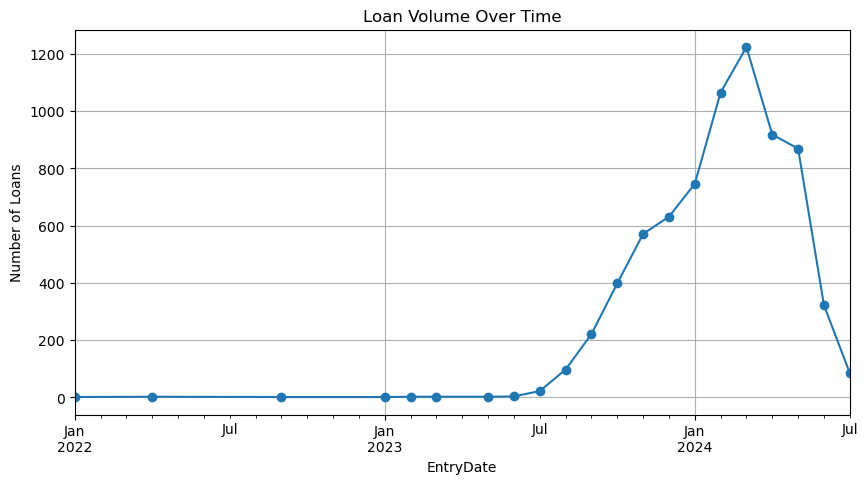

In [14]:

TOT.plot(kind='line', title="Loan Volume Over Time", figsize=(10,5), marker='o')
plt.xlabel("EntryDate")
plt.ylabel("Number of Loans")
plt.grid(True)
plt.show()


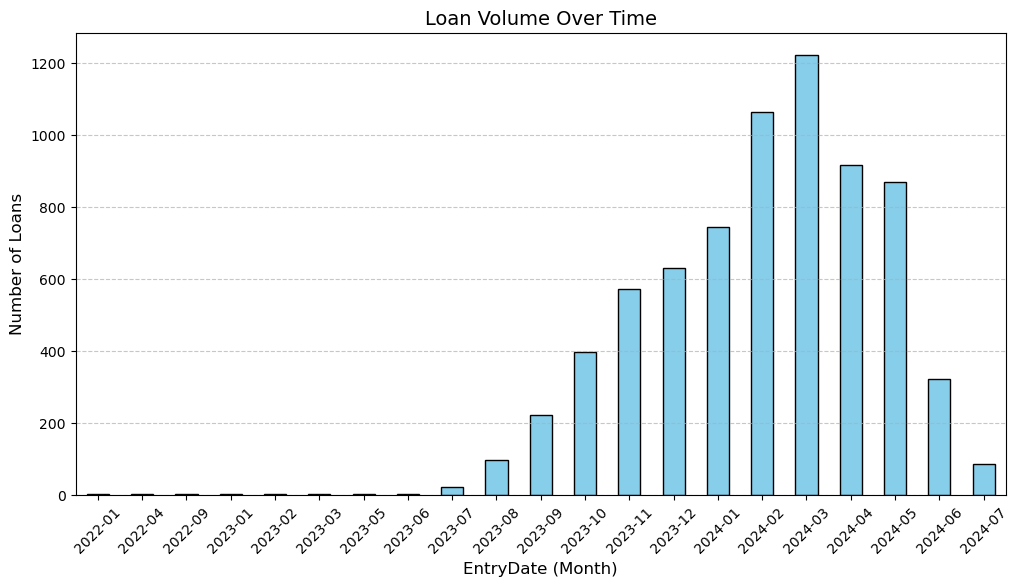

In [15]:
plt.figure(figsize=(12, 6))
TOT.plot(kind="bar", color="skyblue", edgecolor="black")

# Formatting
plt.title("Loan Volume Over Time", fontsize=14)
plt.xlabel("EntryDate (Month)", fontsize=12)
plt.ylabel("Number of Loans", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.show()

In [16]:
# Calculate portfolio growth over three years
# Get the first and last recorded loan volume
first_year = df["EntryDate"].dt.year.min()
last_year = df["EntryDate"].dt.year.max()
print(first_year)
print(last_year)

2022
2024


In [17]:
# Group by year to get total loan count 
portfolio_growth_TLC = df.groupby(df["EntryDate"].dt.year).agg(
    Total_Loan_Count=("LoanNumber", "count"))
portfolio_growth_TLC

,Total_Loan_Count
EntryDate,
2022,4
2023,1950
2024,5229


In [18]:
# Group by year and approved amount
portfolio_growth_TAA = df.groupby(df["EntryDate"].dt.year).agg(
    Total_Approved_Amount=("AmountApproved", "sum"))
portfolio_growth_TAA

,Total_Approved_Amount
EntryDate,
2022,"49,969.95"
2023,"63,768,491.70"
2024,"142,481,903.30"


In [19]:
# Calculate percentage growth over the three years
portfolio_growth = df.groupby(df["EntryDate"].dt.year).agg(
    Total_Loan_Count=("LoanNumber", "count"),
    Total_Approved_Amount=("AmountApproved", "sum")
)
portfolio_growth

,Total_Loan_Count,Total_Approved_Amount
EntryDate,,
2022,4,"49,969.95"
2023,1950,"63,768,491.70"
2024,5229,"142,481,903.30"


In [20]:
# Calculate percentage growth over the three years
initial_loan = portfolio_growth.iloc[0]["Total_Loan_Count"]
final_loan = portfolio_growth.iloc[-1]["Total_Loan_Count"]
loan_growth_rate = ((final_loan - initial_loan) / initial_loan) * 100
loan_growth_rate

130625.0

In [21]:
# Calculate percentage growth over the three years
initial_amount = portfolio_growth.iloc[0]["Total_Approved_Amount"]
final_amount = portfolio_growth.iloc[-1]["Total_Approved_Amount"]
amount_growth_rate = ((final_amount - initial_amount) / initial_amount) * 100
amount_growth_rate

285035.1728388762

In [22]:
# Change to percentage
portfolio_growth["Loan_Count_Growth (%)"] = portfolio_growth["Total_Loan_Count"].pct_change() * 100
portfolio_growth["Approved_Amount_Growth (%)"] = portfolio_growth["Total_Approved_Amount"].pct_change() * 100
portfolio_growth

,Total_Loan_Count,Total_Approved_Amount,Loan_Count_Growth (%),Approved_Amount_Growth (%)
EntryDate,,,,
2022,4,"49,969.95",NaN,NaN
2023,1950,"63,768,491.70","48,650.00","127,513.68"
2024,5229,"142,481,903.30",168.15,123.44


In [23]:
credit_trend_1 = df.groupby(df["EntryDate"].dt.to_period("M")).agg(
    Avg_CreditScore=("CreditScore", "mean"))
credit_trend_1

,Avg_CreditScore
EntryDate,
2022-01,780.00
2022-04,765.50
2022-09,821.00
2023-01,701.00
2023-02,764.50
2023-03,784.00
2023-05,780.50
2023-06,738.67
2023-07,742.05


In [24]:
credit_trend_2 = df.groupby(df["EntryDate"].dt.to_period("M")).agg(
 Avg_JointCreditScore=("JointCreditScore", "mean"))
credit_trend_2

,Avg_JointCreditScore
EntryDate,
2022-01,802.00
2022-04,NaN
2022-09,NaN
2023-01,688.00
2023-02,NaN
2023-03,NaN
2023-05,806.00
2023-06,NaN
2023-07,732.09


In [25]:
credit_trend_3 = df.groupby(df["EntryDate"].dt.to_period("M")).agg(
  Avg_BankruptcyScore=("BankruptcyScore", "mean")
)
credit_trend_3

,Avg_BankruptcyScore
EntryDate,
2022-01,309.00
2022-04,201.00
2022-09,490.00
2023-01,308.00
2023-02,367.50
2023-03,406.50
2023-05,407.50
2023-06,388.00
2023-07,350.27


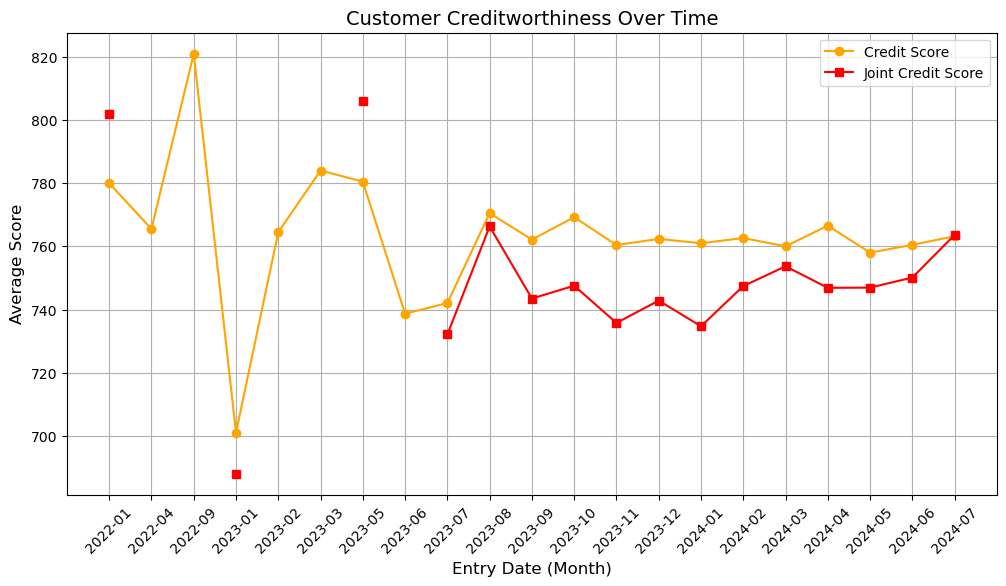

In [26]:

plt.figure(figsize=(12, 6))

# Plot individual credit score trends
plt.plot(credit_trend_1.index.astype(str), credit_trend_1["Avg_CreditScore"], marker='o', label="Credit Score", color='orange')
plt.plot(credit_trend_2.index.astype(str), credit_trend_2["Avg_JointCreditScore"], marker='s', label="Joint Credit Score", color='red')


plt.title("Customer Creditworthiness Over Time", fontsize=14)
plt.xlabel("Entry Date (Month)", fontsize=12)
plt.ylabel("Average Score", fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


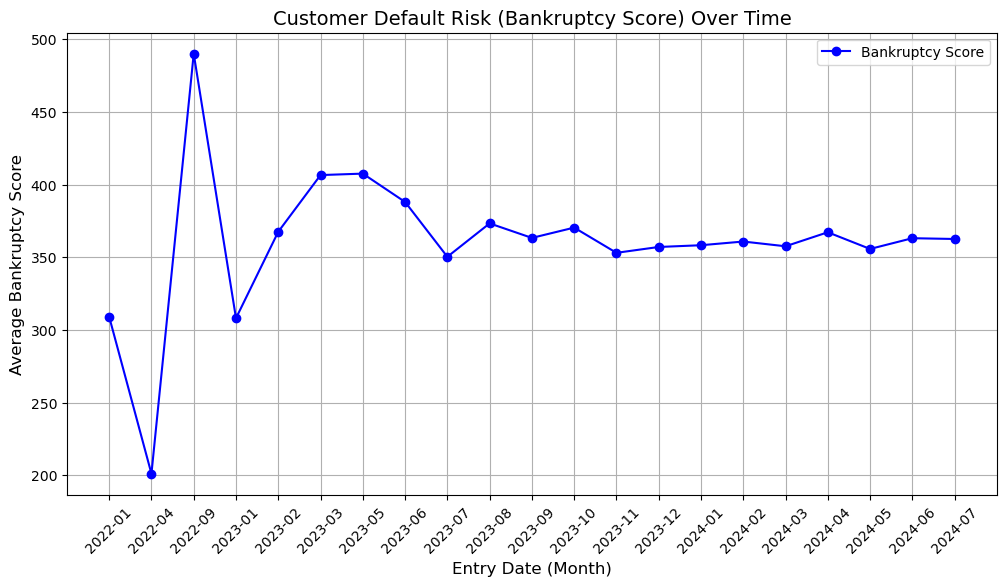

In [27]:
# Plot Bankruptcy Score Trends Over Time
plt.figure(figsize=(12, 6))

plt.plot(credit_trend_3.index.astype(str), credit_trend_3["Avg_BankruptcyScore"], marker='o', color='blue', label="Bankruptcy Score")

# Formatting the chart
plt.title("Customer Default Risk (Bankruptcy Score) Over Time", fontsize=14)
plt.xlabel("Entry Date (Month)", fontsize=12)
plt.ylabel("Average Bankruptcy Score", fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


In [28]:
df.groupby("ClinicName").agg(
    Total_Loan_Count=("LoanNumber", "count"))

,Total_Loan_Count
ClinicName,
3rd ROC Solar,10
8MSolar,51
A.G.U. Roofing,8
ATMA Energy,9
ATX Solar,20
...,...
Window Source of the Carolinas INC,7
Window Source of the Carolinas LLC,4
Window World CC,50


In [29]:
 df.groupby("ClinicName").agg(
    Total_Approved_Amount=("AmountApproved", "sum")
)

,Total_Approved_Amount
ClinicName,
3rd ROC Solar,"499,661.90"
8MSolar,"1,588,399.00"
A.G.U. Roofing,"153,565.00"
ATMA Energy,"397,536.00"
ATX Solar,"779,223.20"
...,...
Window Source of the Carolinas INC,"145,043.57"
Window Source of the Carolinas LLC,"67,984.00"
Window World CC,"667,295.20"


In [30]:
dealer_performance = df.groupby("ClinicName").agg(
    Total_Loan_Count=("LoanNumber", "count"),
    Total_Approved_Amount=("AmountApproved", "sum")
)
dealer_performance

,Total_Loan_Count,Total_Approved_Amount
ClinicName,,
3rd ROC Solar,10,"499,661.90"
8MSolar,51,"1,588,399.00"
A.G.U. Roofing,8,"153,565.00"
ATMA Energy,9,"397,536.00"
ATX Solar,20,"779,223.20"
...,...,...
Window Source of the Carolinas INC,7,"145,043.57"
Window Source of the Carolinas LLC,4,"67,984.00"
Window World CC,50,"667,295.20"


In [31]:
# Top performing dealer loan counts
top_dealer_loan = dealer_performance.sort_values(by="Total_Loan_Count", ascending=False).head(10) 
top_dealer_loan

,Total_Loan_Count,Total_Approved_Amount
ClinicName,,
ES Solar,1022,"32,166,919.26"
Vector Energy LLC,328,"11,207,656.72"
Greenstar Power,225,"7,905,966.83"
PlugPV,211,"7,241,225.91"
Window World SA,185,"2,113,588.55"
Synergy Home,178,"1,830,139.39"
Jon Wayne Service Company,169,"3,004,024.93"
Spring Solar,161,"5,594,193.75"
Convert Solar,159,"5,950,925.50"


In [32]:
# Bottom performing dealer loan counts
bottom_dealer_loan= dealer_performance.sort_values(by="Total_Loan_Count", ascending=True).head(10)
bottom_dealer_loan

,Total_Loan_Count,Total_Approved_Amount
ClinicName,,
Protek Roofing Heating Air & Solar,1,"22,000.00"
Solar Power Integrator,1,"69,961.40"
Beall Power Solutions,1,"52,800.00"
Techline Roofing and Restoration,1,"22,476.33"
Hytech Home,1,"34,536.00"
SolarHut,1,"38,102.00"
Greenbelt Solar,1,"38,795.00"
South Texas Solar Systems Inc,1,"54,331.00"
TruNorth Solar,1,"33,000.00"


In [33]:
top_dealer_amount = dealer_performance.sort_values(by="Total_Approved_Amount", ascending=False).head(10) 
top_dealer_amount

,Total_Loan_Count,Total_Approved_Amount
ClinicName,,
ES Solar,1022,"32,166,919.26"
Vector Energy LLC,328,"11,207,656.72"
Greenstar Power,225,"7,905,966.83"
PlugPV,211,"7,241,225.91"
Convert Solar,159,"5,950,925.50"
Spring Solar,161,"5,594,193.75"
Radix Solar,135,"4,286,309.74"
Smart Wave Solar,126,"3,388,653.00"
Solar Holler,94,"3,366,025.00"


In [34]:
bottom_dealer_amount = dealer_performance.sort_values(by="Total_Approved_Amount", ascending=True).head(10)
bottom_dealer_amount

,Total_Loan_Count,Total_Approved_Amount
ClinicName,,
Alpha Filtronics,1,"3,560.00"
Neri Roofing,1,"5,940.00"
Circle L Roofing,1,"6,800.00"
Choice Heating & Cooling,2,"9,707.00"
Two Brothers Roofing and Exteriors,1,"11,270.83"
Jiles Roofing LLC,2,"11,500.00"
Stephens Roofing & Remodeling,1,"12,106.00"
AZ Insulation & Energy Solutions LLC,1,"14,500.00"
American Home Contractors,1,"14,500.00"


In [37]:
charge_off_df = pd.read_excel(xls, sheet_name="Charge-Offs")

In [38]:
charge_off_df.head()

,Month,Unsecured Portfolio Balance,Unsecured Gross Charge-Offs ($),Unsecured Gross Charge-Offs (%),Unsecured Net\nCharge-Offs ($),Unsecured Net \nCharge-Offs (%),Secured Portfolio Balance,Secured Gross \nCharge-Offs ($),Secured Gross \nCharge-Offs (%),Secured Net \nCharge-Offs ($),Secured Net \nCharge-Offs (%),Total Portfolio Balances,Total Gross Charge-Offs Balances,Total Gross Charge-Offs Perscent,30+ Delinquency (%)
0,2022-01-01,"3,444,267.99","6,191.62",0.00,"4,847.16",0.00,0.00,0.00,0.00,0.00,NaN,"3,444,267.99","6,191.62",0.00,NaN
1,2022-02-01,"3,375,944.06",0.00,0.00,-174.63,-0.00,"27,754.00",0.00,0.00,0.00,0.00,"3,403,698.06",0.00,0.00,NaN
2,2022-03-01,"3,391,219.62","5,709.44",0.00,799.37,0.00,"532,357.79",0.00,0.00,0.00,0.00,"3,923,577.41","5,709.44",0.00,NaN
3,2022-04-01,"3,442,740.92","1,404.18",0.00,603.33,0.00,"1,159,015.62",0.00,0.00,0.00,0.00,"4,601,756.54","1,404.18",0.00,NaN
4,2022-05-01,"3,757,496.87","2,214.24",0.00,"-9,328.92",-0.00,"1,819,487.45",0.00,0.00,0.00,0.00,"5,576,984.32","2,214.24",0.00,NaN


In [39]:
charge_off_df["Month"] = pd.to_datetime(charge_off_df["Month"], errors='coerce')


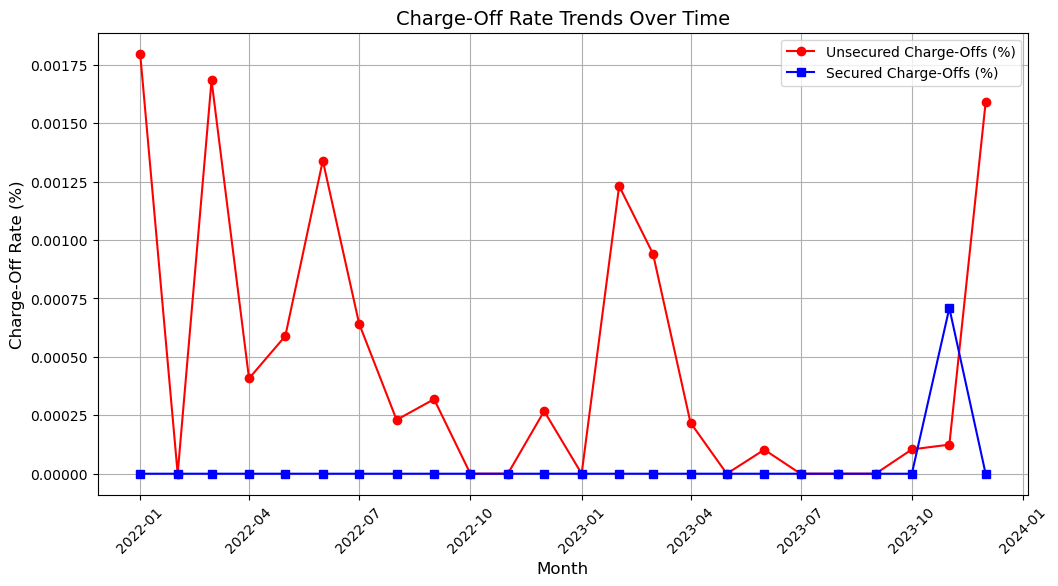

In [40]:

# Set the index to Month for time-series plotting
charge_off_trends = charge_off_df.set_index("Month")

# Plot Charge-Off Trends Over Time
plt.figure(figsize=(12, 6))
plt.plot(charge_off_trends.index, charge_off_trends["Unsecured Gross Charge-Offs (%)"], marker='o', label="Unsecured Charge-Offs (%)", color='red')
plt.plot(charge_off_trends.index, charge_off_trends["Secured Gross \nCharge-Offs (%)"], marker='s', label="Secured Charge-Offs (%)", color='blue')


plt.title("Charge-Off Rate Trends Over Time", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Charge-Off Rate (%)", fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)


plt.show()
